In [1]:
#Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading the crimes data
data = pd.read_csv("Crimes_-_2001_to_present.csv")
# columns in the dataset
print(data.columns)
data.head(3)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4930918,HM544061,08/16/2006 03:55:00 PM,006XX W SHERIDAN RD,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,46.0,6.0,05,1171089.0,1926189.0,2006,02/28/2018 03:56:25 PM,41.952937,-87.646460,"(41.952937476, -87.646459694)"
1,4930924,HM545898,08/17/2006 12:00:00 AM,053XX N CUMBERLAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,41.0,76.0,26,1119313.0,1934228.0,2006,02/28/2018 03:56:25 PM,41.975978,-87.836624,"(41.975978414, -87.83662354)"
2,4930927,HM545908,08/17/2006 03:00:00 PM,021XX N CANNON DR,0810,THEFT,OVER $500,OTHER,False,False,...,43.0,7.0,06,1175179.0,1914632.0,2006,02/28/2018 03:56:25 PM,41.921134,-87.631772,"(41.92113376, -87.631772431)"


In [2]:
#Filtering years from 2007 to 2018
years = [2015,2016,2017,2018]
crimes = data[data.Year.isin(years)]

In [3]:
#Crimes count basing on Crime type
crime_count = pd.DataFrame(crimes.groupby('Primary Type').size().sort_values(ascending=False).rename('Count of Crimes').reset_index())

#crime type having count>=50000
prim_type = pd.DataFrame(crime_count.values[crime_count['Count of Crimes'] >= 70000]) 
prim_type.columns = ['Primary_Type','Count of Crimes']
prim_type

,Primary_Type,Count of Crimes
0,THEFT,248299
1,BATTERY,198207
2,CRIMINAL DAMAGE,116532
3,ASSAULT,75461
4,DECEPTIVE PRACTICE,72329


In [4]:
#filtering crime types having count>=10000 
primary_type = prim_type.Primary_Type
crimes=crimes[crimes['Primary Type'].isin(primary_type)]

In [5]:
#dataset after filtering done basing on primary type and years
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1115329,11207956,JB120346,01/18/2018 09:35:00 AM,076XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,...,17.0,69.0,08B,1175515.0,1854490.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,"(41.756091788, -87.632341337)"
1115337,11236141,JB159579,02/21/2018 12:15:00 AM,044XX S DR MARTIN LUTHER KING JR DR,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,3.0,38.0,14,1179600.0,1875687.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,"(41.814166087, -87.616723368)"
1115338,11236178,JB159602,02/21/2018 12:40:00 AM,037XX W ADDISON ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,30.0,16.0,04B,1150919.0,1923677.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,"(41.946464013, -87.720672053)"
1115342,11236335,JB159893,02/21/2018 08:00:00 AM,072XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,18.0,66.0,06,1160291.0,1856647.0,2018,05/04/2018 03:51:04 PM,41.762338,-87.688075,"(41.762337776, -87.688074906)"
1115349,9989009,HY179160,03/06/2015 06:45:00 PM,028XX W 63RD ST,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,15.0,66.0,06,1158313.0,1862737.0,2015,02/10/2018 03:50:01 PM,41.779090,-87.695159,"(41.779090123, -87.695158983)"


In [6]:
#crimes data shape
crimes.shape

(710828, 22)

In [7]:
#columns data
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
#null values count
crimes.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    3246
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                       3
Community Area             1
FBI Code                   0
X Coordinate            8188
Y Coordinate            8188
Year                       0
Updated On                 0
Latitude                8188
Longitude               8188
Location                8188
dtype: int64

In [9]:
#dropping null values
crimes = crimes.dropna()
#checkign after dropping null values
crimes.isna().sum()
#shape
crimes.shape

(700279, 22)

In [10]:
#Deleting unnecessary columns
columns = ['Case Number','Block','IUCR','Ward','Community Area','FBI Code','Location','Beat',
          'X Coordinate','Y Coordinate']
crimes.drop(columns, inplace=True, axis=1)

In [11]:
#Final dataset
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude
1115329,11207956,01/18/2018 09:35:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341
1115337,11236141,02/21/2018 12:15:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723
1115338,11236178,02/21/2018 12:40:00 AM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672
1115342,11236335,02/21/2018 08:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,8.0,2018,05/04/2018 03:51:04 PM,41.762338,-87.688075
1115349,9989009,03/06/2015 06:45:00 PM,THEFT,RETAIL THEFT,OTHER,False,False,8.0,2015,02/10/2018 03:50:01 PM,41.779090,-87.695159


In [12]:
#Date column
crimes['Date'] = pd.to_datetime(crimes['Date'], format = '%m/%d/%Y %I:%M:%S %p')

In [13]:
#Rerteiving Month from Date column
import calendar
crimes['Month'] = (crimes['Date'].dt.month).apply(lambda x:calendar.month_abbr[x])
crimes.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,Feb


In [14]:
#Retrieving Weekdays from Date column
crimes['Weekday'] = crimes['Date'].dt.weekday_name
crimes['Weekday'] = pd.Categorical(crimes['Weekday'],
            categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered = True)
crimes.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday


In [15]:
crimes['Hour of Day'] = crimes['Date'].dt.hour
crimes['Hour of Day'] = pd.Categorical(crimes['Hour of Day'],
            categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],ordered = True)
crimes.head(2)
#hour = top_crimes.pivot_table(values ='ID', index = 'Primary Type', columns = top_crimes['Date'].dt.hour, aggfunc = np.size)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,Jan,Thursday,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,Feb,Wednesday,0


In [16]:
data_week_dict ={
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}
crimes['Weekday'] = crimes['Weekday'].replace(data_week_dict)

In [17]:
data_month_dict ={
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
crimes['Month'] = crimes['Month'].replace(data_month_dict)

In [18]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,1,4,9
1115337,11236141,2018-02-21 00:15:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,2,3,0
1115338,11236178,2018-02-21 00:40:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,2,3,0
1115342,11236335,2018-02-21 08:00:00,THEFT,$500 AND UNDER,STREET,False,False,8.0,2018,05/04/2018 03:51:04 PM,41.762338,-87.688075,2,3,8
1115349,9989009,2015-03-06 18:45:00,THEFT,RETAIL THEFT,OTHER,False,False,8.0,2015,02/10/2018 03:50:01 PM,41.779090,-87.695159,3,5,18


In [19]:
target = crimes['Primary Type'].unique()
print(target)

['BATTERY' 'CRIMINAL DAMAGE' 'THEFT' 'ASSAULT' 'DECEPTIVE PRACTICE']


In [20]:
data_dict = {}
count = 1
for i in target:
    data_dict[i] = count
    count = count + 1
crimes['Primary Type'] = crimes['Primary Type'].replace(data_dict)

In [21]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,11207956,2018-01-18 09:35:00,1,DOMESTIC BATTERY SIMPLE,STREET,True,False,6.0,2018,05/04/2018 03:51:04 PM,41.756092,-87.632341,1,4,9
1115337,11236141,2018-02-21 00:15:00,2,TO PROPERTY,RESIDENCE,False,False,2.0,2018,05/04/2018 03:51:04 PM,41.814166,-87.616723,2,3,0
1115338,11236178,2018-02-21 00:40:00,1,AGGRAVATED: HANDGUN,STREET,False,False,17.0,2018,05/04/2018 03:51:04 PM,41.946464,-87.720672,2,3,0
1115342,11236335,2018-02-21 08:00:00,3,$500 AND UNDER,STREET,False,False,8.0,2018,05/04/2018 03:51:04 PM,41.762338,-87.688075,2,3,8
1115349,9989009,2015-03-06 18:45:00,3,RETAIL THEFT,OTHER,False,False,8.0,2015,02/10/2018 03:50:01 PM,41.779090,-87.695159,3,5,18


In [22]:
crimes = crimes.drop (['ID','Domestic','Updated On','Arrest'], axis = 1)
#df.drop(['B', 'C'], axis=1)

In [23]:
target_col = pd.DataFrame(crimes['Primary Type'])

In [24]:
crimes = crimes.drop(['Primary Type','Description','Date','District'], axis = 1)

In [25]:
crimes.head()

,Location Description,Year,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,STREET,2018,41.756092,-87.632341,1,4,9
1115337,RESIDENCE,2018,41.814166,-87.616723,2,3,0
1115338,STREET,2018,41.946464,-87.720672,2,3,0
1115342,STREET,2018,41.762338,-87.688075,2,3,8
1115349,OTHER,2015,41.779090,-87.695159,3,5,18


In [26]:
crimes.dtypes

Location Description      object
Year                       int64
Latitude                 float64
Longitude                float64
Month                      int64
Weekday                    int64
Hour of Day             category
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crimes["Location Description"] = le.fit_transform(crimes["Location Description"])
#crimes['Hour of Day'] = le.fit_transform(crimes['Hour of Day'])

In [28]:
X=crimes
y=target_col

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crimes, target_col, test_size=0.33, random_state=42)

In [30]:
crimes.head()

,Location Description,Year,Latitude,Longitude,Month,Weekday,Hour of Day
1115329,95,2018,41.756092,-87.632341,1,4,9
1115337,82,2018,41.814166,-87.616723,2,3,0
1115338,95,2018,41.946464,-87.720672,2,3,0
1115342,95,2018,41.762338,-87.688075,2,3,8
1115349,74,2015,41.779090,-87.695159,3,5,18


In [31]:
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(589379, 7) (589379,)


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
fit = log.fit(X_train,y_train)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\renug\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
from sklearn.metrics import log_loss

y_pred = log.predict(X_test)
logistic_probs = log.predict_proba(X_test)
score = log_loss(y_test, logistic_probs)
print(score)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)*100))

1.4568256343236934
Accuracy of logistic regression classifier on test set: 38.62


# Decision Tree classifier - Gini

In [35]:
from sklearn.tree import DecisionTreeClassifier 
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_split=100)
dtree_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [36]:
from sklearn.metrics import accuracy_score

y_pred = dtree_gini.predict(X_test)
dtree_probs = dtree_gini.predict_proba(X_test)
score = log_loss(y_test, dtree_probs)
print(score)

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

1.3997107713987127
Accuracy is  44.60109133552293


# Decision Tree Classifier - Entropy

In [37]:
dtree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_split=150)
dtree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [38]:
y_pred_en = dtree_entropy.predict(X_test)
dtree_ent_probs = dtree_entropy.predict_proba(X_test)
score = log_loss(y_test, dtree_ent_probs)
print(score)


1.3922002729953593


In [39]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  43.37907249462338


# Random Forest

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy is  48.106606431177056
Log Loss: 1.579217138195
Classification report:               precision    recall  f1-score   support

           1       0.61      0.47      0.53     85095
           2       0.22      0.35      0.27     24555
           3       0.68      0.54      0.60    101789
           4       0.05      0.22      0.08      5936
           5       0.30      0.46      0.36     13718

   micro avg       0.48      0.48      0.48    231093
   macro avg       0.37      0.41      0.37    231093
weighted avg       0.57      0.48      0.51    231093



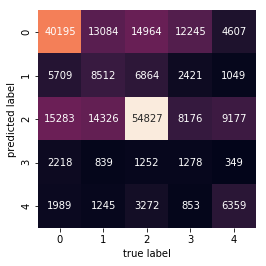

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=50, random_state=0)
#visualize_classifier(model, X, y)

rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,ypred)*100)

rf_probs = rf.predict_proba(X_test)
score = log_loss(y_test, rf_probs)
print("Log Loss:",score)

print("Classification report:",metrics.classification_report(ypred, y_test))

mat = metrics.confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,knn_pred)
print("Accuracy:",accuracy)

knn_probs = knn.predict_proba(X_test)
score = log_loss(y_test, knn_probs)
print("Log Loss:",score)

C:\Users\renug\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.460606768703509
Log Loss: 3.0049433659571827


# Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy:",accuracy)

gnb_probs = gnb.predict_proba(X_test)
score = log_loss(y_test, gnb_probs)
print("Log Loss:",score)

C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.39586659916137656
Log Loss: 1.438615013942363


# Adaboost classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

adbc = AdaBoostClassifier(n_estimators=100,learning_rate=1,base_estimator=dtree_gini)
adbc.fit(X_train, y_train)
adbc_pred = adbc.predict(X_test)
accuracy = accuracy_score(y_test, adbc_pred)
print("Accuracy:",accuracy)

adbc_probs = adbc.predict_proba(X_test)
score = log_loss(y_test, adbc_probs)
print("Log Loss:",score)


C:\Users\renug\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4979640231421982
Log Loss: 1.6000320200003166
